# Final Project - Python for Finance

## Name: Jooji Tani

## This project involves conducting data analysis of the financial market and macroeconomic scenario 

## 1.0 Imports

### We start importing the libraries 

In [3]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nasdaqdatalink

## 2.0 Loading Data

### In this step we choose the stocks that we will analyze and load in a dataframe
- I chose APPL, MSFT, AMZN, GOOGL and META
- Period from 2020-01-01 to 2023-12-31(to get till the most recent date)

In [4]:
symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']
df = yf.download(symbols, start = '2020-01-01', end = '2023-12-31')['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [5]:
# Verifying if we get the data correctly
df.head()

,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2020-01-02,73.249023,94.900497,68.433998,209.779999,155.093674
2020-01-03,72.536888,93.748497,68.075996,208.669998,153.162476
2020-01-06,73.114876,95.143997,69.890503,212.600006,153.558380
2020-01-07,72.771034,95.343002,69.755501,213.059998,152.158279
2020-01-08,73.941635,94.598503,70.251999,215.220001,154.581940


## 3.0 Analysing the data

### Let's see some statistical values

In [36]:
df.describe()

,AAPL,AMZN,GOOGL,META,MSFT
count,931.000000,931.000000,931.000000,931.000000,931.000000
mean,136.068247,137.072669,105.748848,243.529979,251.702810
std,32.539921,28.419156,24.890222,70.475770,50.950771
min,54.848965,81.820000,52.706501,88.910004,131.117874
25%,119.466240,111.474998,87.014000,187.485001,211.458565
50%,142.068695,140.570007,105.599998,243.580002,251.037079
75%,159.314049,162.118004,126.100002,301.300003,290.162918
max,196.185074,186.570496,149.838501,382.179993,358.730469


- We can note that META it's highly volatile as the standard devion is 70
- MSFT have the highest average value and GOOGLE have the lowest

### Graphics

### First let's compare the stocks in a simple graphic

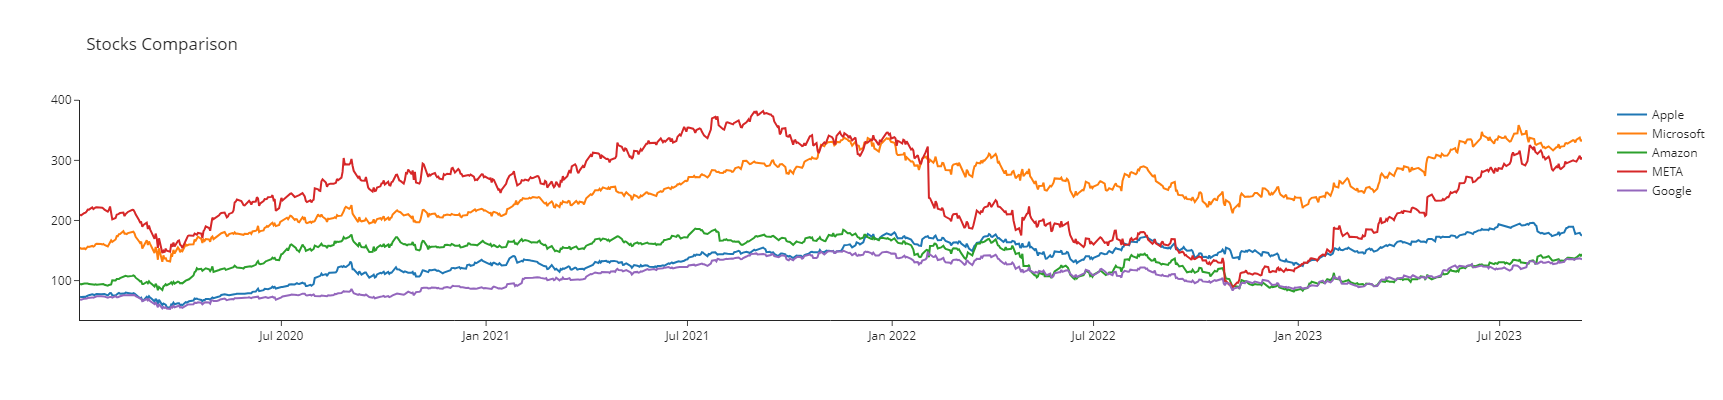

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='Apple', x=df.index, y=df['AAPL']))
fig.add_trace(go.Scatter(name='Microsoft', x=df.index, y=df['MSFT']))
fig.add_trace(go.Scatter(name='Amazon', x=df.index, y=df['AMZN']))
fig.add_trace(go.Scatter(name='META', x=df.index, y=df['META']))
fig.add_trace(go.Scatter(name='Google', x=df.index, y=df['GOOGL']))

fig.update_layout(title_text='Stocks Comparison', template='simple_white', width=1500, height=400)
fig.show()

- We can observe that Google and Apple, started almost with the same price but at the moment Apple has a higher price
- META went down abbrubtaly in 2022 but recovered this year

### Standardizing data

### Let's standardize to get a better comparison between the stocks

In [14]:
standardize = df/df.iloc[0]

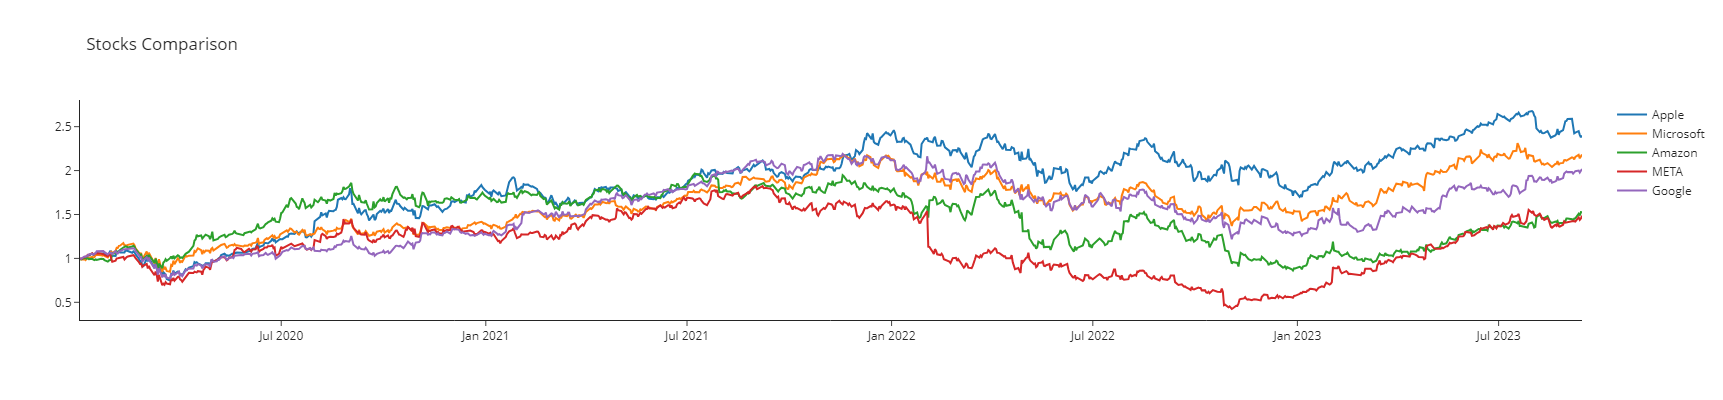

In [15]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='Apple', x=standardize.index, y=standardize['AAPL']))
fig.add_trace(go.Scatter(name='Microsoft', x=standardize.index, y=standardize['MSFT']))
fig.add_trace(go.Scatter(name='Amazon', x=standardize.index, y=standardize['AMZN']))
fig.add_trace(go.Scatter(name='META', x=standardize.index, y=standardize['META']))
fig.add_trace(go.Scatter(name='Google', x=standardize.index, y=standardize['GOOGL']))

fig.update_layout(title_text='Stocks Comparison', template='simple_white', width=1500, height=400)

fig.show()

- We note here that Apple has ther better performance among the stocks, and that META was the worst and couldn't assume that in the previous graphic

## 4.0 Macroeconomic Scenario

In [40]:
# API Key Setup
nasdaqdatalink.ApiConfig.api_key = 'KesAhpoPNDupqzixzxws'

In [18]:
# Getting values of interest rate, inflation and sp500
interest_rate = nasdaqdatalink.get('FRED/EFFR', start_date='2020-01-01', end_date='2023-12-31')
inflation_usa = nasdaqdatalink.get('RATEINF/INFLATION_USA', start_date='2020-01-01', end_date='2023-12-31')
sp = yf.download('^GSPC', start='2020-01-01', end='2023-12-31')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


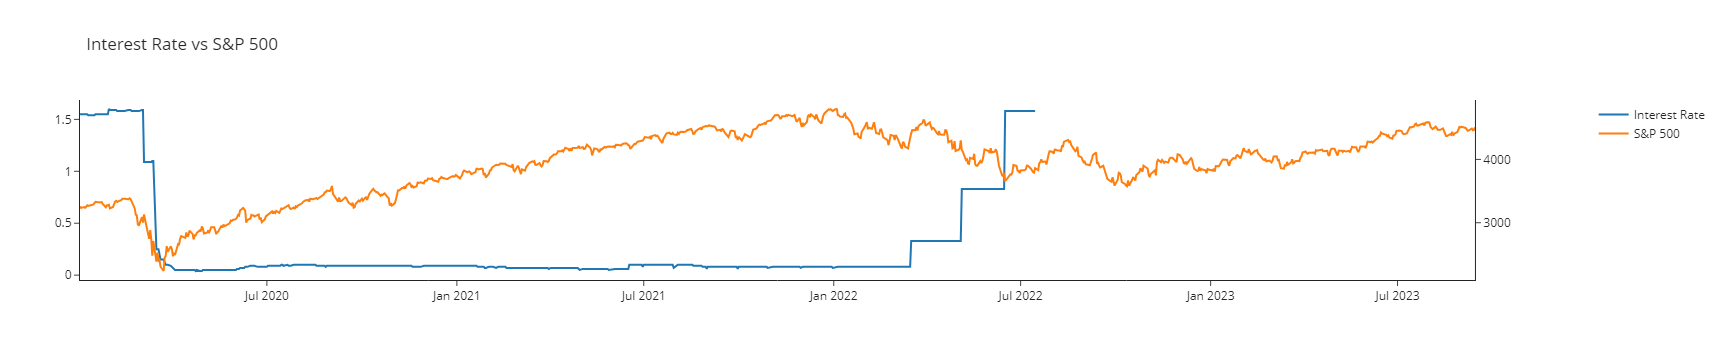

In [19]:
# Let's see the graphic comparing the interest rate x S&P 500
fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='Interest Rate', x=interest_rate.index, y=interest_rate.Value), row=1, col=1)
fig.add_trace(go.Scatter(name='S&P 500', x=sp.index, y=sp), row=1,col=1,secondary_y=True)
fig.update_layout(title_text='Interest Rate vs S&P 500', template='simple_white')
fig.show()

- Unfortunately we only have values of the interest rates until july 2022
- It seems that in higher interest rates SP500 go down and in lower interest rates SP500 goes up

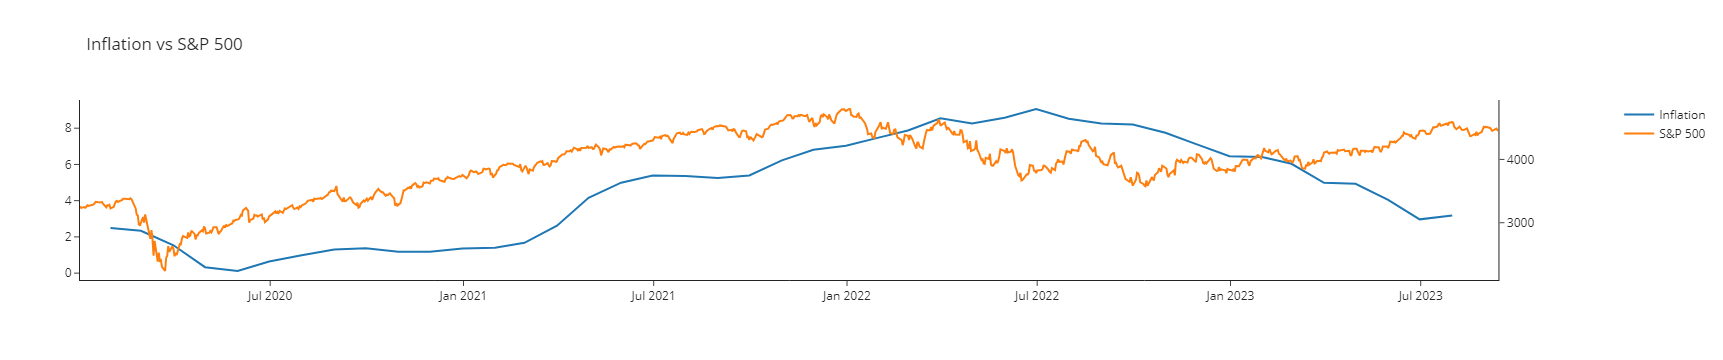

In [45]:
# Let's see the graphic comparing the inflation x S&P 500

fig = make_subplots(rows=1, cols=1, specs=[[{'secondary_y': True}]])
fig.add_trace(go.Scatter(name='Inflation', x=inflation_usa.index, y=inflation_usa.Value), row=1, col=1)
fig.add_trace(go.Scatter(name='S&P 500', x=sp.index, y=sp), row=1,col=1,secondary_y=True)
fig.update_layout(title_text='Inflation vs S&P 500', template='simple_white')
fig.show()

- In the period of 2020 and 2021 the trend between inflation and sp500 looked at the same direction but after 2022 they look inversely proportional

## 5.0 Evaluation of tech sector

### Now we will compare tech sector stocks in the aspect of their fundamentals

In [31]:
# Create an empty list
data = []

# Loop through each ticker symbol
for ticker in symbols:
    # Create a Ticker object
    company = yf.Ticker(ticker)

    # Get fundamental data
    fundamental_data = company.info

    # Extract fundamental items of our interest
    fundamental_items = {
        "Company": fundamental_data.get('longName'),
        "Sector": fundamental_data.get('sector'),
        "MarketCap": fundamental_data.get('marketCap'),
        "EnterpriseValue": fundamental_data.get('enterpriseValue'),
        "Revenue": fundamental_data.get('totalRevenue'),
        "ProfitMargin": fundamental_data.get('profitMargins'),
        "OperatingMargin": fundamental_data.get('operatingMargins'),
        "dividendRate": fundamental_data.get('dividendRate'),
        "beta": fundamental_data.get('beta'),
        "ebitda": fundamental_data.get('ebitda')

    }

    # Append data to the list
    data.append(fundamental_items)

# Create a pandas DataFrame from the list of dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df

,Company,Sector,MarketCap,EnterpriseValue,Revenue,ProfitMargin,OperatingMargin,dividendRate,beta,ebitda
0,Apple Inc.,Technology,2742082338816,2801705943040,383932989440,0.24681,0.29231,0.96,1.274896,123957002240
1,Microsoft Corporation,Technology,2486220619776,2433157693440,211914997760,0.34146,0.41773,2.72,0.904564,102022995968
2,"Amazon.com, Inc.",Consumer Cyclical,1482667851776,1567491883008,538046005248,0.02429,0.03291,NaN,1.235822,63431000064
3,Alphabet Inc.,Communication Services,1712742727680,1617602019328,289531002880,0.21052,0.26437,NaN,1.059820,91374002176
4,"Meta Platforms, Inc.",Communication Services,784890986496,774933512192,120524996608,0.18706,0.29219,NaN,1.234094,44913999872


In [32]:
df.index = df.Company

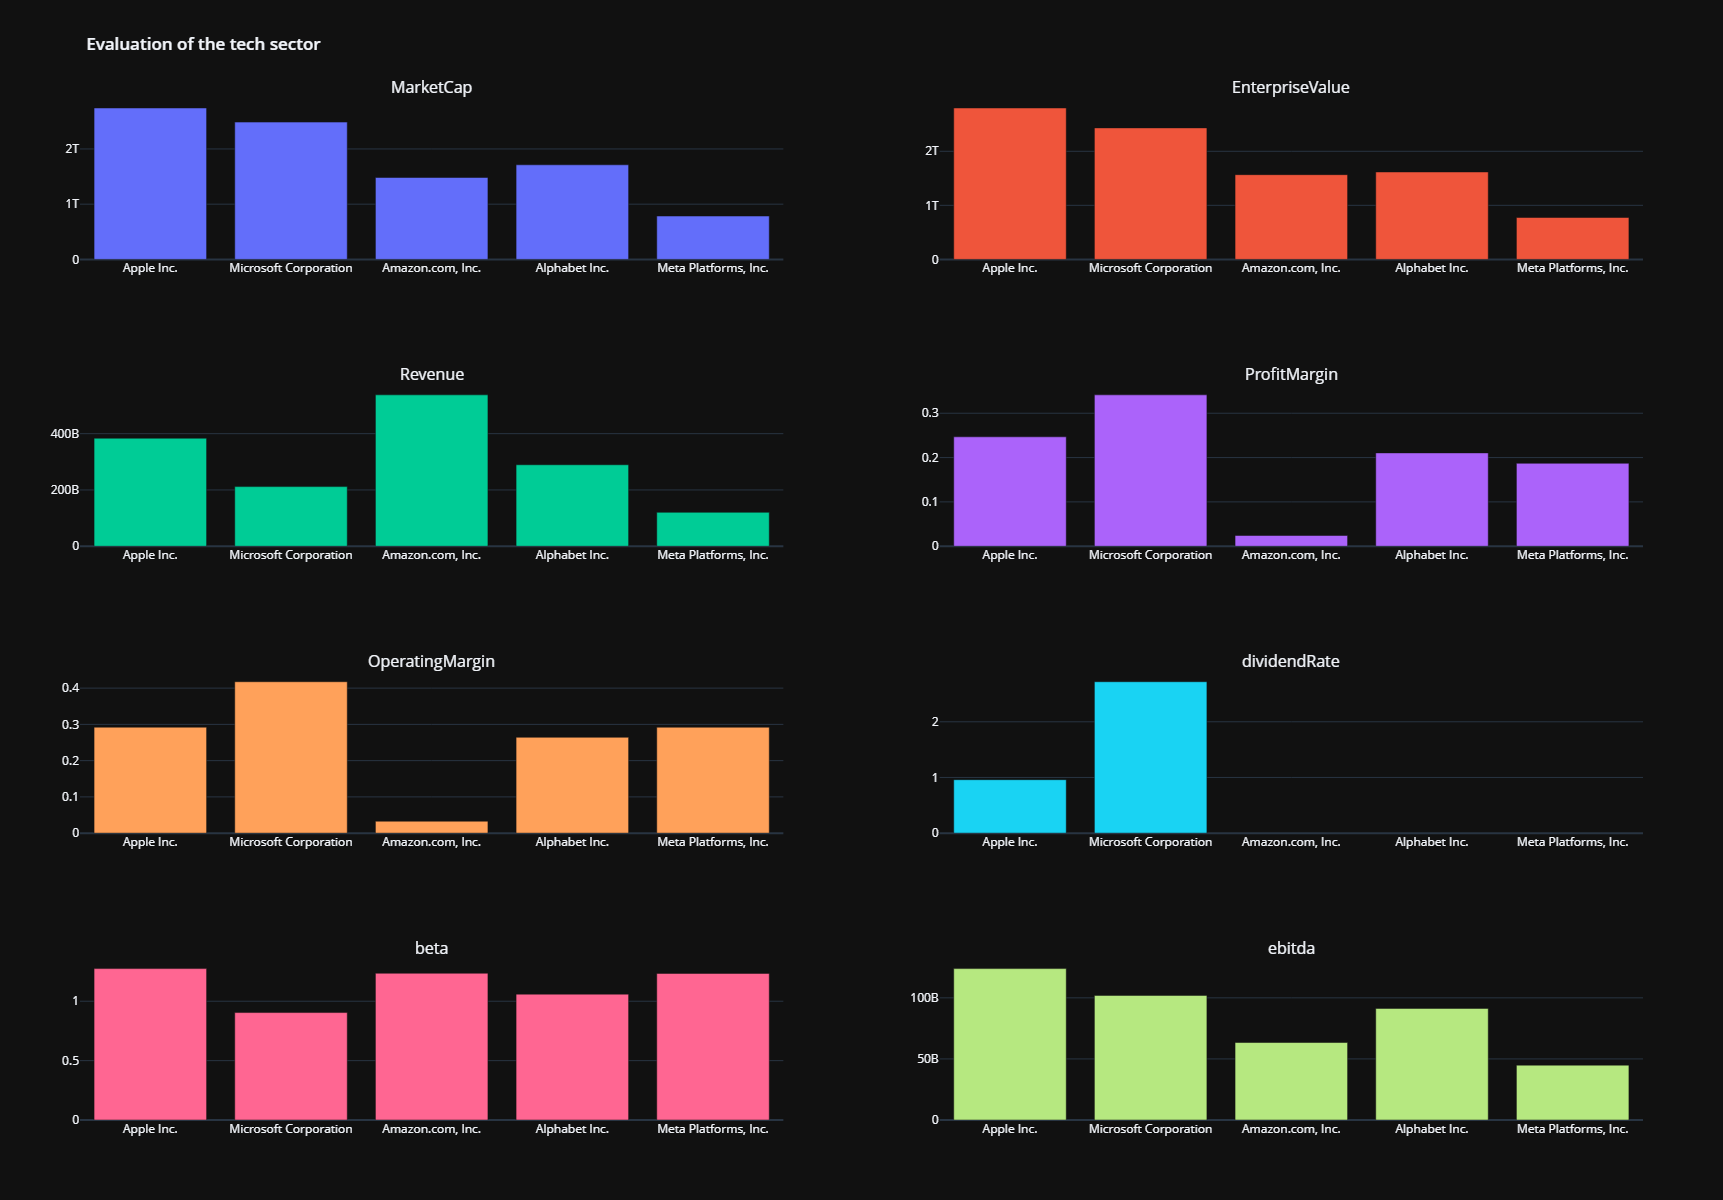

In [33]:
fig = make_subplots(rows=4,
                    cols=2,
                    row_heights=[4,4,4,4],
                    column_widths=[4,4],
                    subplot_titles=('MarketCap', 'EnterpriseValue', 'Revenue', 'ProfitMargin',
                                   'OperatingMargin', 'dividendRate', 'beta', 'ebitda'),
                    shared_xaxes=False)

fig.add_trace(go.Bar(name='MarketCap', x=df.index, y=df['MarketCap']), row=1, col=1)
fig.add_trace(go.Bar(name='EnterpriseValue', x=df.index, y=df['EnterpriseValue']), row=1, col=2)

fig.add_trace(go.Bar(name='Revenue', x=df.index, y=df['Revenue']), row=2, col=1)
fig.add_trace(go.Bar(name='ProfitMargin', x=df.index, y=df['ProfitMargin']), row=2, col=2)

fig.add_trace(go.Bar(name='OperatingMargin', x=df.index, y=df['OperatingMargin']), row=3, col=1)
fig.add_trace(go.Bar(name='dividendRate', x=df.index, y=df['dividendRate']), row=3, col=2)

fig.add_trace(go.Bar(name='beta', x=df.index, y=df['beta']), row=4, col=1)
fig.add_trace(go.Bar(name='ebitda', x=df.index, y=df['ebitda']), row=4, col=2)

fig.update_layout(title_text='<b>Evaluation of the tech sector<b>',
                  template='plotly_dark',
                  showlegend=False,
                  height=1200,
                  width=900)
fig.show()

- Apple has the largest MarketCap and Entreprise Value but don't have the better Revenue neither Profit Margin
- Also Amazon has the largest Revenue despite having the worst Profit Margin and Operating Margin
- Google(Alphabet Inc.) almost always appears 3rd in rank, it looks like a stable company
